# **Act 1. Regresion lineal Multiple**

> CO2 Emission by Vehicles

- **Andrés Alejandro Guzmán González | A01633819**
- **Joel Isaias Solano Ocampo | A01639289**
- **Tania Sayuri Guizado Hernández | A01640092**
- **Ernesto Reynoso Lizárraga | A01639915**

---

**Contenidos**

- **5.1** - Temas avanzados sobre análisis regresión

- **5.1.1** - Verificación de supuestos: QQ-plots & análisis de residuales

- **5.2** - Estadística para datos multivariados

**1. ¿Qué pasa con el fit del modelo y a que se lo atribuye?**

*Con el avance del proceso, el fit del modelo mejora. En primer lugar el modelo usó las variables regresoras ('Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)') y como variable de respuesta se tomó la emisón de CO2 ('CO2 Emissions(g/km)'), dicho modelo tuvo un ajuste de 0.904. Al obtener este resultado, se realizó el análisis de distribución y disperción de erroes, esto buscando definir una estrategia para mejora el ajuste general del modelo. Asím mismo se realizó el proceso de transformaciones de la variable dependiente con el fin de asimilarla a una distribución norma. Realizado este proceso, se identificó que las transformaciones asimétricas positivas aplicando la raiz cuadrada y logarítmo base 10 lograban este objetivo y al realizar nuevamente el fit del modelo, se aumentó el ajuste a 0.915 y 0.925 respectivamente.*

**2. ¿Qué sucede con el error y la distribución de este en los datos?**

*Siguinedo la respuesta de la pregunta anterior el error se reduce considerablemente conforme se aplican las transformaciones a los datos. Definitivamente el buscar una distribución lo más cercana a la normal ayuda al modelo a que las predicciones sean más acertadas.*


**3. Describa el impacto de las distintas variables ¿Que sucede si se omiten las variables con nulo impacto?**


*Finalmente, al identificar las variables que menos impactaban en modelo qe acuerdo con el P-Valor no hubo y hacer el proceso de eliminación de variables no hubo ninguna mejora en el ajuste sin embargo, identificamos que al eliminar solo una de estas las demás los P-Valores de las demás quedan en 0, denotando que impactan el modelo de regresión de manera importante.*


##Llamado a librerias:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, skewnorm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Importamos los datos a un DataFrame

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Reto IA/Actividades/CO2_Emissions/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
df.shape

(7385, 12)

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


##Funciones generales

Funcion para graficar en base a un modelo de distribucion QQPlot:

In [ ]:
def QQPlot(x, y, dst):
  X = sm.add_constant(x)
  model = sm.OLS(y, X)
  result = model.fit()
  influence = result.get_influence()
  standardized_residuals = influence.resid_studentized_internal
  fig = sm.qqplot(standardized_residuals, dist = dst, line = 'q')
  plt.title('QQ Graph - Normal Distribution')
  plt.ylabel('Standarized residuals Quantiles')
  plt.grid()
  plt.show()

Funcion para obtener los parametros y R^2 de cada iteracion de variable predictora con el modelo OLS:

In [ ]:
def OLS(x, y):
  x = sm.add_constant(x)
  model = sm.OLS(y, x)
  result = model.fit()
  print('Params:', result.params)
  print('R^2:', result.rsquared)

Función para graficar las gráficas de asimetría

In [ ]:
def Asimetric_Dist(r, title):
  plt.hist(r, density = True, bins = 'auto', histtype='stepfilled', alpha=0.2)
  plt.title(title)
  plt.grid()
  plt.show()

##Modelo de regresión

In [ ]:
x = np.array(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']])
y = np.array(df['CO2 Emissions(g/km)'])

Obtenemos el valor de R^2 y los resultados de nuestro modelo de regresion OLS:

In [ ]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

print('\n', results.params)
print('\n', 'R2: ', results.rsquared)
print(results.summary())


 [ 2.27892751e+02  4.99360380e+00  7.53852995e+00 -2.37835507e-02
  4.49061364e+00  1.67304643e+00 -3.42349241e+00]

 R2:  0.9039065926000305
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.157e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:12:07   Log-Likelihood:                -31880.
No. Observations:                7385   AIC:                         6.377e+04
Df Residuals:                    7378   BIC:                         6.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

Graficamos los valores predichos vs residuos estandarizados:

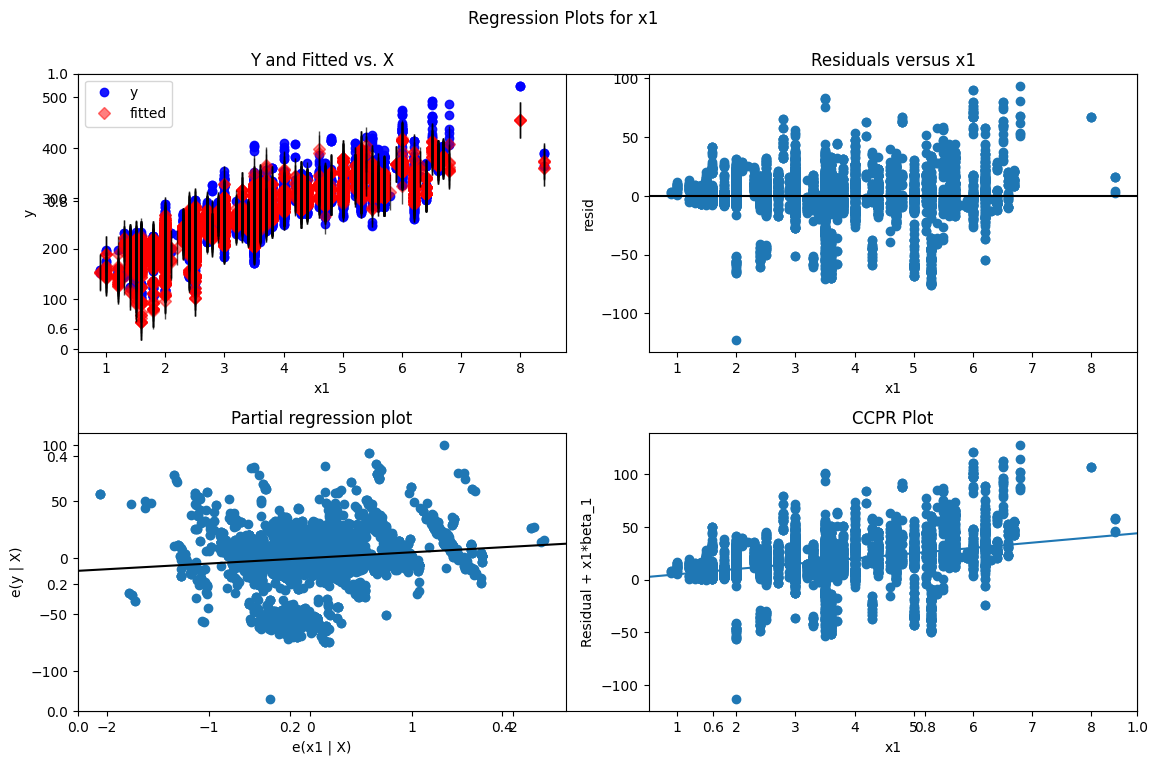

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_regress_exog(results, 1, fig=fig)
plt.show()

Obtenemos los residuales estandarizados de la influencia de los resultados:

In [ ]:
influence = results.get_influence()
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)

[-0.17261704 -0.00677114 -0.05425761 ...  0.48654435  0.53345117
  0.6779954 ]


Realizamos una funcion que nos permite graficar una grafica QQPlot con los datos residuales estandarizados:

In [ ]:
def QQPlot_std_residual(std_res, d, l, title):
  fig = sm.qqplot(std_res, dist = d, line = l)
  plt.title(title)
  plt.ylabel('Standarized residuals Quantiles')
  plt.grid()
  plt.show()

* Distribucion uniforme:

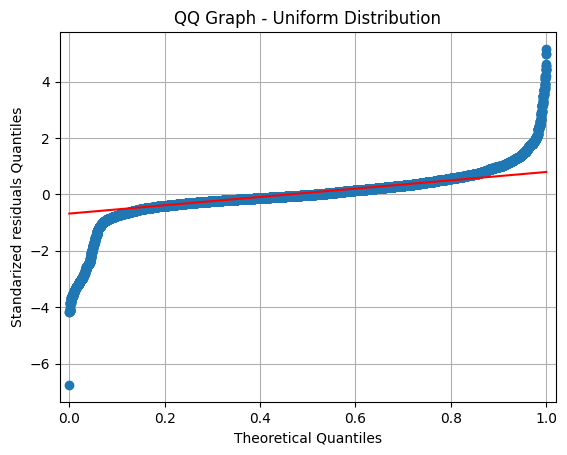

In [ ]:
QQPlot_std_residual(standardized_residuals, uniform, 'q', 'QQ Graph - Uniform Distribution')

* Distribucion normal:

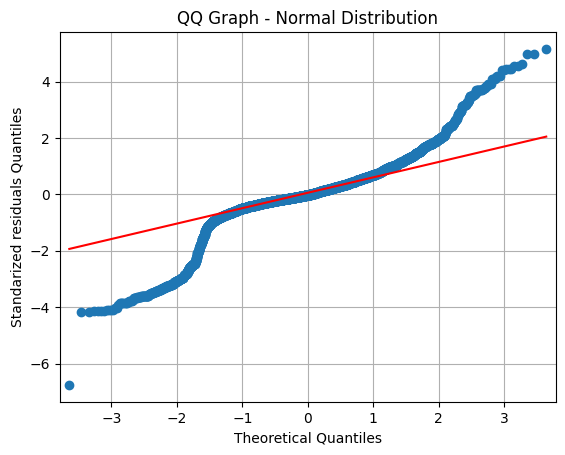

In [ ]:
QQPlot_std_residual(standardized_residuals, norm, 'q', 'QQ Graph - Normal Distribution')

* Distribucion normal de inclinacion positiva:

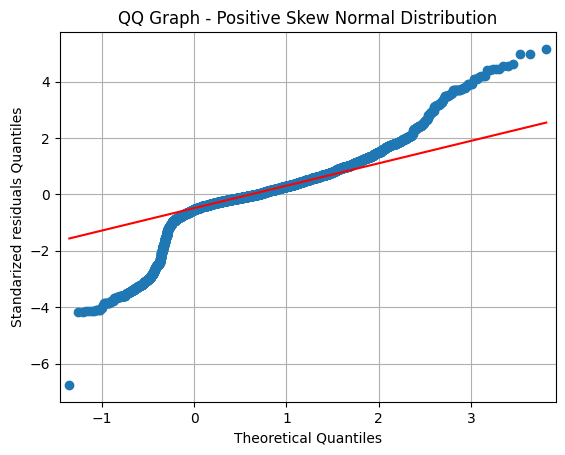

In [ ]:
QQPlot_std_residual(standardized_residuals, skewnorm(2), 'q', 'QQ Graph - Positive Skew Normal Distribution')

* Distribucion normal de distribucion negativa:

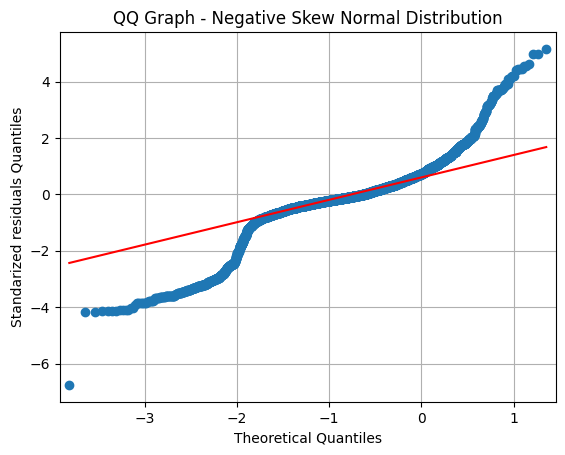

In [ ]:
QQPlot_std_residual(standardized_residuals, skewnorm(-2), 'q', 'QQ Graph - Negative Skew Normal Distribution')

##Búsqueda de la transformacion adecuada

### Distribucion Asimetrica Negativa
---



Distribucion Asimetrica Negative (1/3):

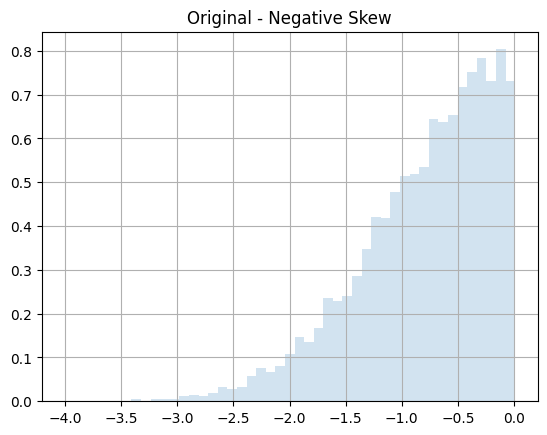

In [ ]:
y_skew_neg = -skewnorm.rvs(y)
Asimetric_Dist(y_skew_neg, 'Original - Negative Skew')

Distribucion Asimetrica Negative (2/3):

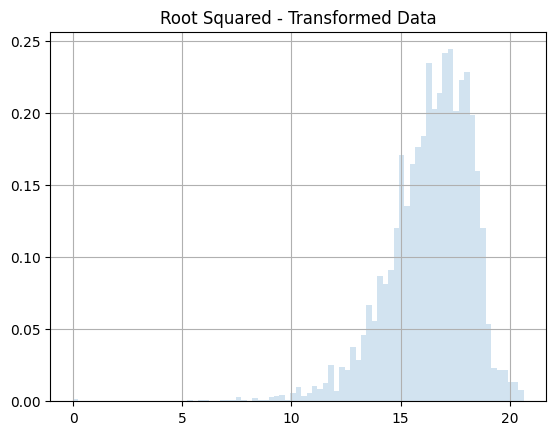

In [ ]:
y_pos = y + abs(min(y))
y_root_neg = np.sqrt(max(y_pos) - y_pos)
Asimetric_Dist(y_root_neg, 'Root Squared - Transformed Data')

Distribucion Asimetrica Negative (3/3):

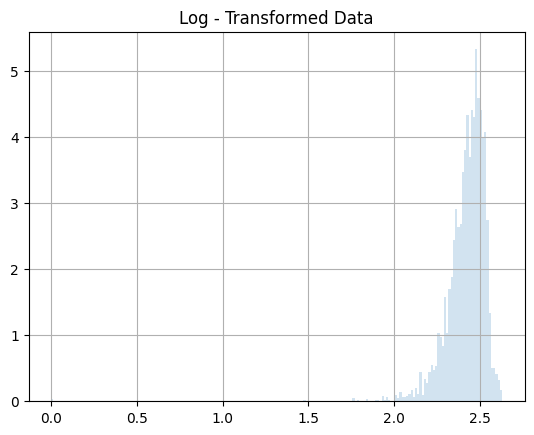

In [ ]:
y_positive = y + abs(min(y))
y_log_neg = np.log10(1 + max(y_positive) - y_positive)
Asimetric_Dist(y_log_neg, 'Log - Transformed Data')

### Distribucion Asimetrica Positiva
---



Distribucion Asimetrica Positiva:


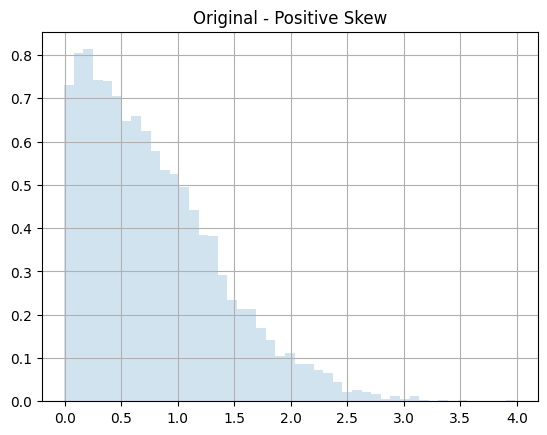

In [ ]:
y_skew = skewnorm.rvs(y)
Asimetric_Dist(y_skew, 'Original - Positive Skew')

Distribucion Asimetrica Positiva:

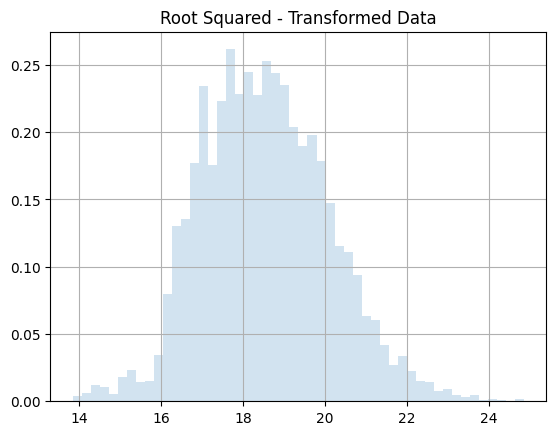

In [ ]:
y_root = np.sqrt(y + abs(min(y)))
Asimetric_Dist(y_root, 'Root Squared - Transformed Data')

Distribucion Asimetrica Positiva:

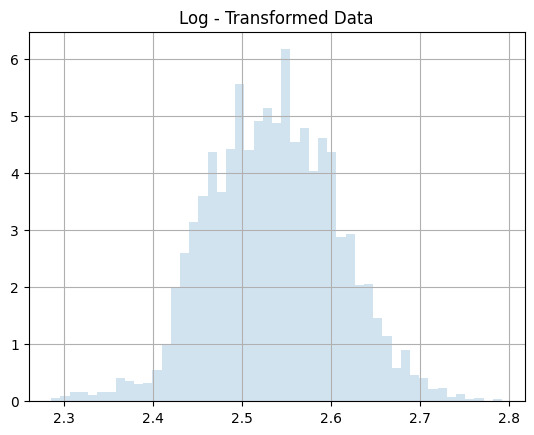

In [ ]:
y_log = np.log10(1 + y + abs(min(y)))
Asimetric_Dist(y_log, 'Log - Transformed Data')

In [ ]:
model = sm.OLS(y_root, X)
results = model.fit()
print('\n', results.params)
print('\n', 'R2: ', results.rsquared)
print(results.summary())


 [ 1.94367810e+01  1.33053149e-01  1.85578182e-01 -5.95956234e-03
  1.18164557e-01 -6.19298157e-03 -1.19108371e-01]

 R2:  0.9152323690604602
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:12:13   Log-Likelihood:                -4635.1
No. Observations:                7385   AIC:                             9284.
Df Residuals:                    7378   BIC:                             9333.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

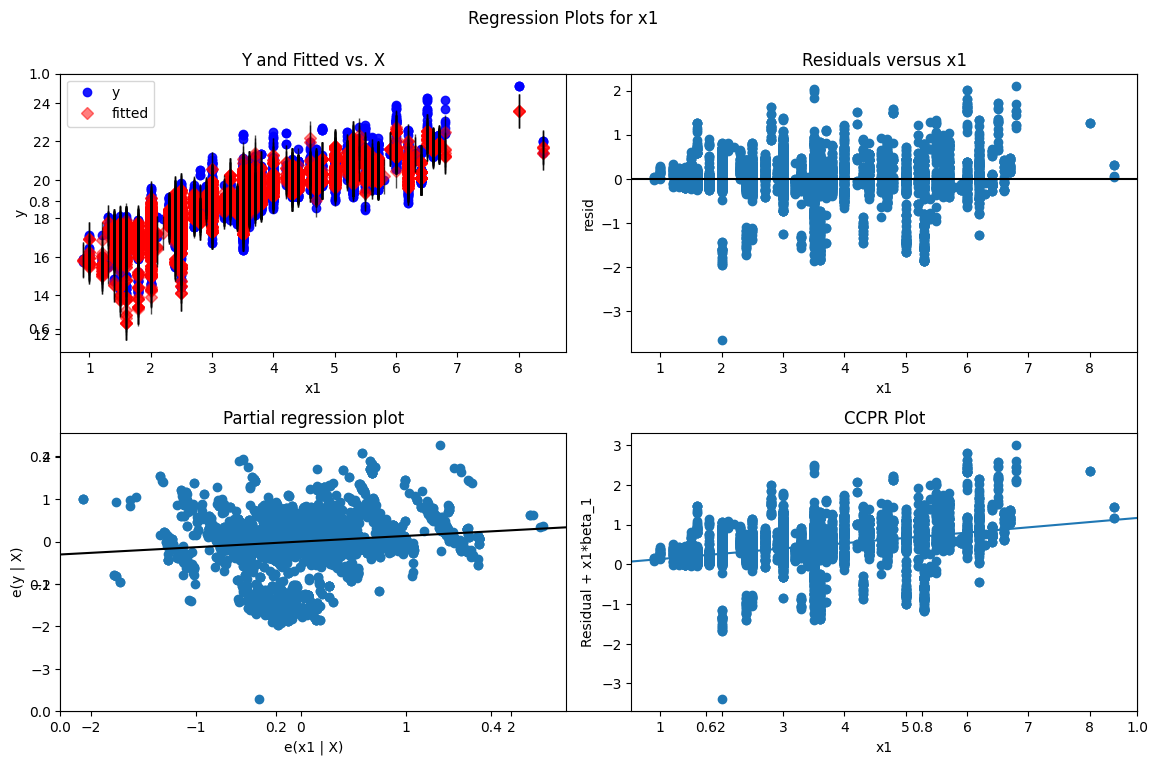

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_regress_exog(results, 1, fig=fig)
plt.show()

##Evaluación del impacto de cada variable independiente

In [ ]:
model = sm.OLS(y_log, X)
results = model.fit()
print('\n', results.params)
print('\n', 'R2: ', results.rsquared)
print(results.summary())


 [ 2.64703621e+00  6.01517403e-03  7.91678618e-03 -3.12833476e-04
  5.42435642e-03 -2.91406589e-03 -6.86385862e-03]

 R2:  0.9250969146244696
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:12:14   Log-Likelihood:                 18468.
No. Observations:                7385   AIC:                        -3.692e+04
Df Residuals:                    7378   BIC:                        -3.687e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

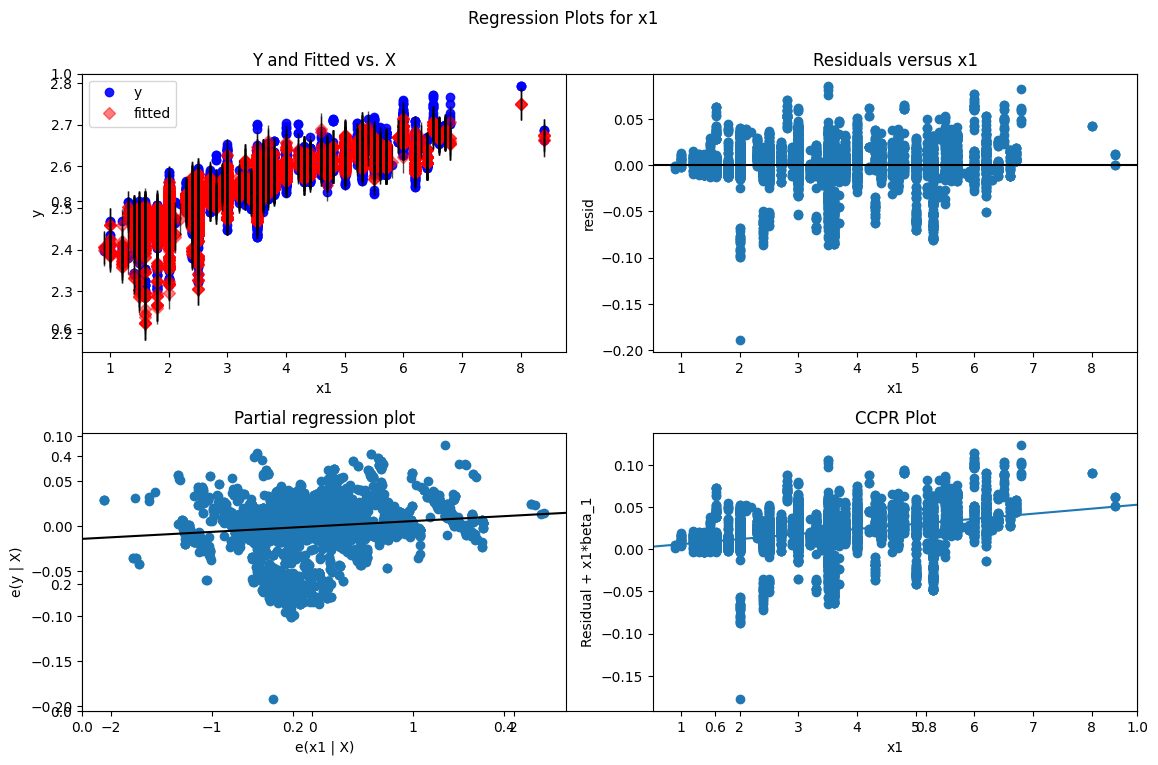

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_regress_exog(results, 1, fig=fig)
plt.show()

In [ ]:
x = np.array(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']])
X = sm.add_constant(x)

model = sm.OLS(y_log, X)
results = model.fit()
print('\n', results.params)
print('\n', 'R2: ', results.rsquared)
print(results.summary())


 [ 2.64703287  0.00601547  0.00791563  0.00567639 -0.00347904 -0.00686376]

 R2:  0.9250968039653008
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.823e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:12:16   Log-Likelihood:                 18468.
No. Observations:                7385   AIC:                        -3.692e+04
Df Residuals:                    7379   BIC:                        -3.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
x = np.array(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (mpg)']])
X = sm.add_constant(x)

model = sm.OLS(y_log, X)
results = model.fit()
print('\n', results.params)
print('\n', 'R2: ', results.rsquared)
print(results.summary())


 [ 2.64693737e+00  6.01076984e-03  7.91847138e-03 -1.91065345e-03
  4.11171738e-03 -6.86193779e-03]

 R2:  0.9250939993765741
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.823e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:12:16   Log-Likelihood:                 18468.
No. Observations:                7385   AIC:                        -3.692e+04
Df Residuals:                    7379   BIC:                        -3.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----